In [120]:
import pandas as pd
from openpyxl import load_workbook
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv (r'tingkat_fasilitas_kesehatan.csv')
df

,Provinsi,jumlah_kepadatan_dan_distribusi_tenaga_kesehatan,jumlah_fasilitas_bangunan_kesehatan
0,ACEH,497,2187
1,SUMATERA UTARA,254,8725
2,SUMATERA BARAT,311,6395
3,RIAU,252,3274
4,JAMBI,429,1996
5,SUMATERA SELATAN,311,4757
6,BENGKULU,536,1253
7,LAMPUNG,207,676
8,KEP. BANGKA BELITUNG,440,795
9,KEP. RIAU,322,854


In [122]:
df.isna().sum()

Provinsi                                            0
jumlah_kepadatan_dan_distribusi_tenaga_kesehatan    0
jumlah_fasilitas_bangunan_kesehatan                 0
dtype: int64

In [123]:
x = df[['jumlah_kepadatan_dan_distribusi_tenaga_kesehatan', 'jumlah_fasilitas_bangunan_kesehatan']].as_matrix()
print(x)

[[  497  2187]
 [  254  8725]
 [  311  6395]
 [  252  3274]
 [  429  1996]
 [  311  4757]
 [  536  1253]
 [  207   676]
 [  440   795]
 [  322   854]
 [  725  4726]
 [  111 30467]
 [  262 34780]
 [  464  4489]
 [  260 37799]
 [  126  4655]
 [  392  3060]
 [  657  4019]
 [  273  5575]
 [  303  1801]
 [  437   729]
 [  334  1455]
 [  410  2096]
 [  498   440]
 [  420  2439]
 [  490  1421]
 [  352  6552]
 [  499  1758]
 [  459   735]
 [  306  1005]
 [  423   415]
 [  423   882]
 [  495  1301]
 [  326  3045]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


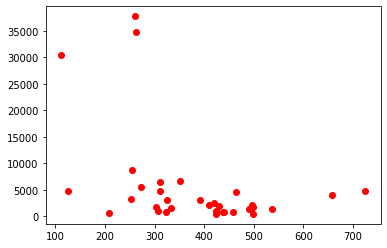

In [124]:
#melihat visualisasi data dari x
plt.plot(x[:,0],x[:,1],'ro')

In [125]:
#inisialisasi nilai cluster 3
kmeans = KMeans(n_clusters = 3)

In [126]:
#melakukan clustering dengan data x
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [127]:
cluster = kmeans.cluster_centers_

In [128]:
#melihat pusat cluster 1-3
print(cluster)

[[  385.88888889  5543.66666667]
 [  211.         34348.66666667]
 [  404.45454545  1528.04545455]]


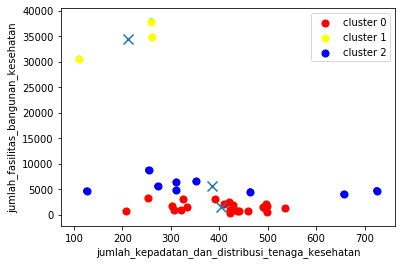

In [129]:
plt.scatter(x[:,0],x[:,1],c=kmeans.labels_,marker='o')
centroids = kmeans.cluster_centers_
labels = kmeans.labels_  

y_km = kmeans.fit_predict(x)
plt.scatter(x[y_km ==0,0], x[y_km == 0,1], s=50, color='red',label='cluster 0')
plt.scatter(x[y_km ==1,0], x[y_km == 1,1], s=50, color='yellow',label='cluster 1')
plt.scatter(x[y_km ==2,0], x[y_km == 2,1], s=50, color='blue',label='cluster 2')
plt.scatter(centroids[: , 0], centroids[: , 1], marker = 'x', s = 100, linewidths = 10, zorder = 20)
plt.legend()
plt.xlabel('jumlah_kepadatan_dan_distribusi_tenaga_kesehatan')
plt.ylabel('jumlah_fasilitas_bangunan_kesehatan')
plt.show()

In [130]:
y_predicted = kmeans.fit_predict(df[['jumlah_kepadatan_dan_distribusi_tenaga_kesehatan', 'jumlah_fasilitas_bangunan_kesehatan']])
y_predicted

array([2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2])

In [131]:
df['cluster'] = y_predicted
df

,Provinsi,jumlah_kepadatan_dan_distribusi_tenaga_kesehatan,jumlah_fasilitas_bangunan_kesehatan,cluster
0,ACEH,497,2187,2
1,SUMATERA UTARA,254,8725,0
2,SUMATERA BARAT,311,6395,0
3,RIAU,252,3274,2
4,JAMBI,429,1996,2
5,SUMATERA SELATAN,311,4757,0
6,BENGKULU,536,1253,2
7,LAMPUNG,207,676,2
8,KEP. BANGKA BELITUNG,440,795,2
9,KEP. RIAU,322,854,2


In [132]:
df['cluster'].value_counts()

2    22
0     9
1     3
Name: cluster, dtype: int64

In [133]:
df

,Provinsi,jumlah_kepadatan_dan_distribusi_tenaga_kesehatan,jumlah_fasilitas_bangunan_kesehatan,cluster
0,ACEH,497,2187,2
1,SUMATERA UTARA,254,8725,0
2,SUMATERA BARAT,311,6395,0
3,RIAU,252,3274,2
4,JAMBI,429,1996,2
5,SUMATERA SELATAN,311,4757,0
6,BENGKULU,536,1253,2
7,LAMPUNG,207,676,2
8,KEP. BANGKA BELITUNG,440,795,2
9,KEP. RIAU,322,854,2
